In [1]:
import cv2
import PIL
import urllib
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

### Define a helper method to fetch images given a URL

In [3]:
def url_to_array(url):
    req = urllib.request.urlopen(url)
    arr = np.array(bytearray(req.read()), dtype=np.int8)
    arr = cv2.imdecode(arr, -1)
    arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
    
    return arr

In [4]:
mug = 'https://goodstock.photos/wp-content/uploads/2018/01/Laptop-Coffee-Mug-on-Table.jpg'
mug = url_to_array(mug)

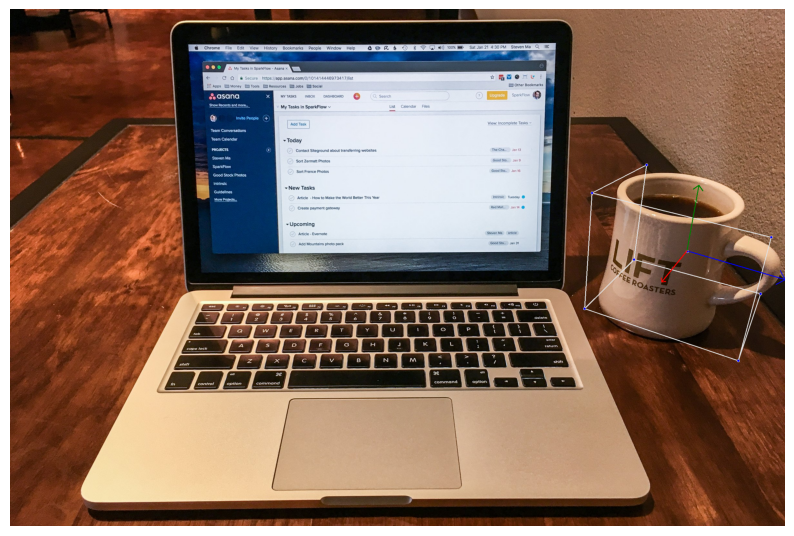

In [5]:
objectron = mp_objectron.Objectron(
    static_image_mode= True,
    max_num_objects= 5,
    min_detection_confidence= 0.2,
    model_name= 'Cup'
)

# Process the image
results = objectron.process(mug)

# Display the Result
if not results.detected_objects:
    print(f'No box landmarks detected')
    
# Creates a copy of the original image (mug) to avoid drawing directly on it
annotated_image = mug.copy()

for detected_object in results.detected_objects:
    # Draw landmarks
    mp_drawing.draw_landmarks(annotated_image,
                             detected_object.landmarks_2d,
                             mp_objectron.BOX_CONNECTIONS)
    
    # Draw axis based on rotation and translation
    mp_drawing.draw_axis(annotated_image,
                        detected_object.rotation,
                        detected_object.translation)

    
# Plot the Result
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(annotated_image)
ax.axis('off')
plt.show()